# Otsu local 

Note: you may need to restart the kernel to use updated packages.


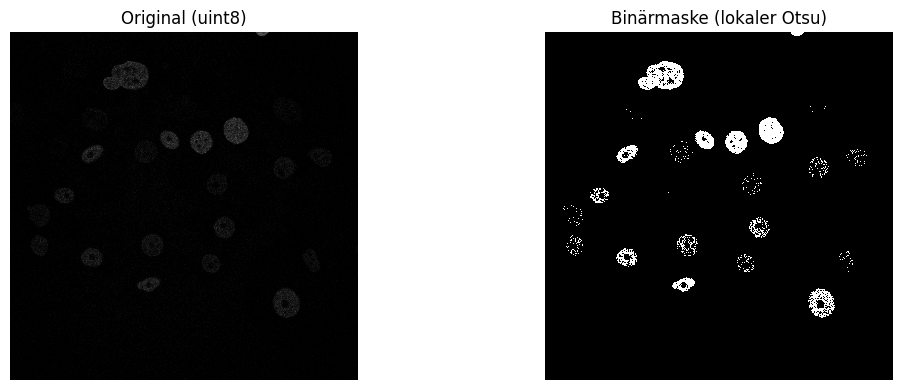

(1024, 1024)
Working Directory: /Users/leomueller-deahna/Documents/Studium/Uni Heidelberg/3.-4. Semester/Bioinformatik/Data Analysis/topic01_team03


In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from skimage import io, img_as_ubyte
from skimage.filters import rank
from skimage.morphology import disk

# 1) Wo sitzt dein Notebook gerade?
notebook_path = Path().resolve()      # aktuelles Arbeitsverzeichnis

from src.find_image import load_image_gray # loading image find function across all data

%pip install imagecodecs

# 2) Bild laden (als Float [0,1]) und in uint8 (0–255) umwandeln:
image =  load_image_gray("t01.tif")
image_u8   = img_as_ubyte(image)


# 3) Lokalen Otsu‐Filter aus skimage.filters.rank importieren
#    Dafür brauchst du 8-Bit-Bild UND einen strukturellen Element‐ („footprint“) Kreis.
radius = 2000  # halbe Fenstergröße ~ 7 → 15×15 Pixel-Fenster
footprint = disk(radius)

# 4) rank.otsu berechnet für **jeden Pixel** den Otsu-Schwellwert
#    innerhalb des kreisförmigen Nachbarschaftsbereichs (footprint).
t_local_rank = rank.otsu(image_u8, footprint)


# 5) Erzeuge die Binärmaske: Werte > lokaler Threshold → 1; sonst 0
binary_local_rank = image_u8 > t_local_rank

# 6) Anzeigen
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(image_u8, cmap="gray", vmin=0, vmax=255, interpolation="none")
axes[0].set_title("Original (uint8)") 
axes[0].axis("off")

axes[1].imshow(binary_local_rank, cmap="gray", interpolation="none")
axes[1].set_title("Binärmaske (lokaler Otsu)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

print(image.shape)

print("Working Directory:", os.getcwd())
